Accurate rainfall prediction is vital for a range of sectors, including agriculture, transportation, event planning, and disaster management. The ability to predict whether it will rain the next day can significantly help individuals and organizations make better decisions, such as whether to carry an umbrella or prepare for adverse weather conditions.
This project, aim to predict the likelihood of rainfall for the following day using historical weather data collected from various locations across Australia over a span of 10 years.

Data Source: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

This project investigates the performance of various machine learning models for predicting rainfall the following day, with a focus on different strategies for handling missing data and addressing class imbalance. The dataset used includes a variety of weather-related features such as temperature, humidity, wind speed, and rainfall. To manage missing values, three strategies were tested: imputing missing numerical values using mean or median, and removing rows with missing data. Five machine learning algorithms—Logistic Regression, Random Forest, XGBoost, KNeighbors, and Voting Classifier—were trained and evaluated using these different imputation methods. In addition, the class imbalance in the target variable was addressed using the Synthetic Minority Over-sampling Technique (SMOTE). The results reveal that Random Forest consistently outperformed the other models across all imputation strategies.

Step1 : Import the necessary libraries and load the Dataset
1. Import the necessary libraries such as Pandas, NumPy, Seaborn.
2.Load the Australia rain dataset using Pandas library.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import os
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#the dataset should be uploaded to the drive
path = "/content/drive/Shareddrives/MATH607/weatherAUS.csv"
df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 2 : Dataset detailed exploration

In [ ]:
#taking a peek into dataframe
print(df.head(5))
#Checking the Dimensions of Dataset:
print(df.shape)
# A concise summary of a Dataset:
print(df.info())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

In [ ]:
# statistics for all columns of the dataset
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
#columns names in the dataset
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
#unique values under each columns
df.nunique( )


,0
Date,3436
Location,49
MinTemp,389
MaxTemp,505
Rainfall,681
Evaporation,358
Sunshine,145
WindGustDir,16
WindGustSpeed,67
WindDir9am,16


In [ ]:
#checking for null values
df.isnull().sum()
#Checking percentage of missing data in every column
(df.isnull().sum()/len(df))*100

,0
Date,0.000000
Location,0.000000
MinTemp,1.020899
MaxTemp,0.866905
Rainfall,2.241853
Evaporation,43.166506
Sunshine,48.009762
WindGustDir,7.098859
WindGustSpeed,7.055548
WindDir9am,7.263853


In [ ]:
#the dataset is balanced or not can be found

df.RainToday.value_counts()

,count
RainToday,
No,110319
Yes,31880


In [ ]:
df.RainTomorrow.value_counts()

,count
RainTomorrow,
No,110316
Yes,31877


In [ ]:
#Changing yes and no to 1 and 0
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
print(df.RainToday)
print(df.RainTomorrow)


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    0.0
Name: RainToday, Length: 145460, dtype: float64
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    NaN
Name: RainTomorrow, Length: 145460, dtype: float64


Step 3: Imputing the missing values with mean/median/removing the missing values. Only one among the 3 code given below session will be in effect for the rest of the project. Since it is comparing the effect of these imputaions on ML algorithms, need to choose each of these seperately for the comparisons.

In [ ]:
#Filling the missing values for continuous variables with median
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].median())
df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].median())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].median())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].median())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].median())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].median())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].median())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].median())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].median())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].median())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].median())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].median())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].median())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].median())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].median())

In [ ]:
#Filling the missing values for continuous variables with mean
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())


In [ ]:
#dropping all missing rows
df.dropna(inplace=True,axis=0)
# summarize the shape of the data with missing rows removed
print(df.shape)


(56420, 23)


In [ ]:
#Filling the missing values for continuous variables with mode
df['WindGustDir']= df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [ ]:
#Checking percentage of missing data in every column

(df.isnull().sum()/len(df))*100

,0
Date,0.0
Location,0.0
MinTemp,0.0
MaxTemp,0.0
Rainfall,0.0
Evaporation,0.0
Sunshine,0.0
WindGustDir,0.0
WindGustSpeed,0.0
WindDir9am,0.0


In [ ]:
#Now all missing values are 0. We can drop date column as it has no meaningful effect on our dataset
df=df.iloc[:,1:]
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0.0,0.0
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0.0,0.0
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0.0,0.0
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0.0,0.0
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0.0,0.0
142299,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0.0,0.0
142300,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0.0,0.0
142301,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0.0,0.0


Step 4 : Change the categorical variables to numeric

In [ ]:
# Changing categorical variables to numeric
from pandas._libs.algos import diff_2d
le = preprocessing.LabelEncoder()
df['Location'] =le.fit_transform(df['Location'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])

Step 5: Find correlation between variables.

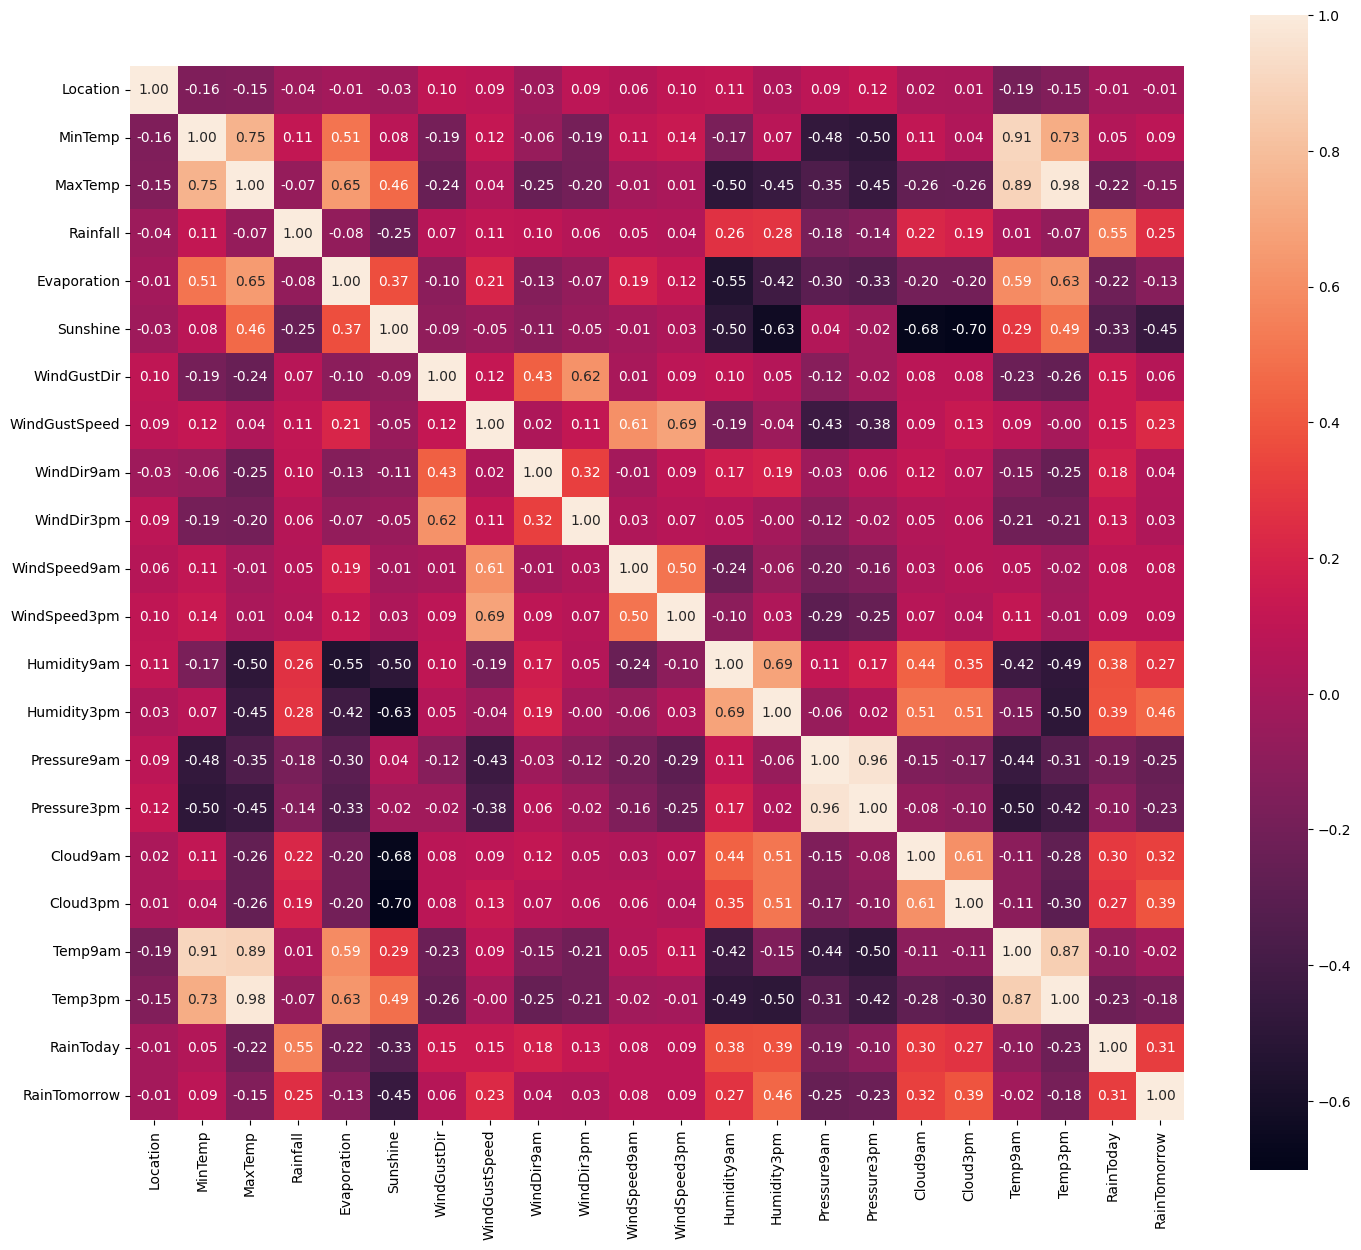

In [ ]:
#Plot heatmap to find correlation(multicollinearity) among categorical varaibles.

plt.figure(figsize=(17,15))
ax = sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

From heatmap we can see that some variables are highly correlated.We may try removing one from each multicollinear variables to perform better. Keeping them for the time being.
Maxtemp and Mintemp are correlated.
Humidity9am and Humidity3pm highly correlated.
MinTemp and Temp9am highly correlated.
MaxTemp and Temp9am highly correlated.
MinTemp and Temp3pm highly correlated.
MaxTemp and Temp3pm highly correlated.
Temp3pm and Temp9am are correlated.
WindGustSpeed and Windspeed3pm are correlated.
WindGustSpeed and Windspeed9am are correlated.
Pressure9am and Pressure3pm are correlated.

Step 6: Split the dataset into test and train and standardize them to a similar scale.

In [ ]:
# Set the random seed- reproducability
np.random.seed(42)

#Train test split

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=42)

In [ ]:
#As these columns are different in scale, they are Standardized to have common scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Step 7:  Apply SMOTE to balance the dataset.

In [ ]:
#Balancing the data using SMOTE; see the count of y_train values(0/1) to see if balanced
os = SMOTE()
x_train, y_train = os.fit_resample(x_train, y_train)
count = Counter(y_train)
print(count)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Counter({0.0: 35194, 1.0: 35194})


Step 8: FIt Different ML algorithms.

In [ ]:
#Fit the model and test the performance of the model using different ML algorithms
#Since its a problem with imbalanced data, accuracy is not the metric for performance so we can use f1_score for a better performance measure


#Logistic Regression

from sklearn.metrics import classification_report

model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(x_train, y_train)
predicted=model_lr.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print(conf)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for logistic regression is :",f1_score(y_test, predicted,)*100, "%")
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,predicted,labels=[1,0])
print('Classification report : \n',matrix)

print("Train Data Score: {}".format(model_lr.score(x_train, y_train)))
print("Test Data Score: {}".format(model_lr.score(x_test, y_test)))
#print(classification_report(y_test, predicted))
# Dictionary to store model names and their accuracies
model_accuracies = {}
accuracy_lr = accuracy_score(y_test, predicted) * 100
model_accuracies['Logistic Regression'] = accuracy_lr


[[7140 1659]
 [ 535 1950]]
The accuracy of Logistic Regression is :  80.55654023395958 %

F1 score for logistic regression is : 63.99737446668855 %
Classification report : 
               precision    recall  f1-score   support

           1       0.54      0.78      0.64      2485
           0       0.93      0.81      0.87      8799

    accuracy                           0.81     11284
   macro avg       0.74      0.80      0.75     11284
weighted avg       0.84      0.81      0.82     11284

Train Data Score: 0.8060464851963403
Test Data Score: 0.8055654023395958


In [ ]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predictions = dt.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
accuracy_dt = accuracy_score(y_test, predictions) * 100
model_accuracies['Decision Tree'] = accuracy_dt


[[7384 1415]
 [1036 1449]]
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      8799
         1.0       0.51      0.58      0.54      2485

    accuracy                           0.78     11284
   macro avg       0.69      0.71      0.70     11284
weighted avg       0.80      0.78      0.79     11284

0.782789790854307


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
accuracy = accuracy_score(y_test,pred)

print('Accuracy :',accuracy)
print('f1',classification_report(y_test,pred))
print('matrix',confusion_matrix(y_test,pred))
accuracy_knn = accuracy_score(y_test, pred) * 100
model_accuracies['K-Nearest Neighbors'] = accuracy_knn

Accuracy : 0.8035271180432471
f1               precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      8799
         1.0       0.55      0.57      0.56      2485

    accuracy                           0.80     11284
   macro avg       0.71      0.72      0.72     11284
weighted avg       0.81      0.80      0.80     11284

matrix [[7661 1138]
 [1079 1406]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predictions = rf.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
accuracy_rf = accuracy_score(y_test, predictions) * 100
model_accuracies['Random Forest'] = accuracy_rf

[[7968  831]
 [ 841 1644]]
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91      8799
         1.0       0.66      0.66      0.66      2485

    accuracy                           0.85     11284
   macro avg       0.78      0.78      0.78     11284
weighted avg       0.85      0.85      0.85     11284

0.8518255937610776


In [ ]:
# Now, the dictionary model_accuracies contains the accuracy of each model
print("Model Accuracies:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.2f}%")

Model Accuracies:
Logistic Regression: 80.56%
Decision Tree: 78.28%
K-Nearest Neighbors: 80.35%
Random Forest: 85.18%


In [ ]:
#Accuracy for median imputation
median_model_accuracies = model_accuracies
print("Model Accuracies Median Imputation:")
for model, accuracy in median_model_accuracies.items():
    print(f"{model}: {accuracy:.2f}%")

Model Accuracies Median Imputation:
Logistic Regression: 78.79%
Decision Tree: 77.34%
K-Nearest Neighbors: 79.66%
Random Forest: 84.58%


The Random Forest model is showing the best accuracy with median imputation with Median values. Same way we are going to try different models performance with mean imputation and removing missing values.

In [ ]:
#Accuracy for mean imputation
mean_model_accuracies = model_accuracies
print("Model Accuracies Mean Imputation:")
for model, accuracy in mean_model_accuracies.items():
    print(f"{model}: {accuracy:.2f}%")

Model Accuracies Mean Imputation:
Logistic Regression: 79.29%
Decision Tree: 77.90%
K-Nearest Neighbors: 80.51%
Random Forest: 85.09%


The Random Forest model is showing the best accuracy with mean imputation with Median values. Same way we are going to try different models performance with removing missing values.

In [ ]:
#Accuracy for dropping missing rows
drop_model_accuracies = model_accuracies
print("Model Accuracies Removal of missing values:")
for model, accuracy in drop_model_accuracies.items():
    print(f"{model}: {accuracy:.2f}%")

Model Accuracies Removal of missing values:
Logistic Regression: 80.56%
Decision Tree: 78.28%
K-Nearest Neighbors: 80.35%
Random Forest: 85.18%


The Random Forest model is showing the best accuracy with removing missing values.

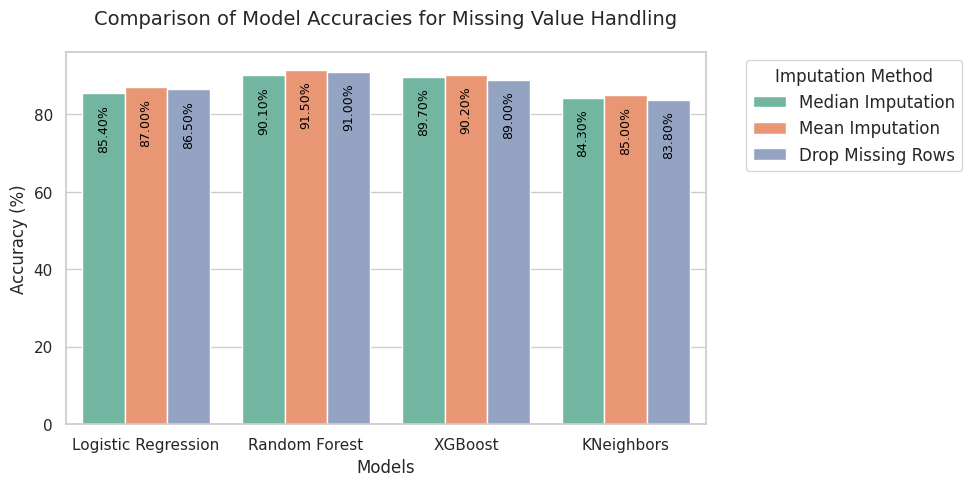

In [ ]:
# Sample accuracy data for the three strategies (median imputation, mean imputation, removal of rows)
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'KNeighbors'],
    'Median Imputation': [78.79, 90.1, 89.7, 84.3],
    'Mean Imputation': [87.0, 91.5, 90.2, 85.0],
    'Drop Missing Rows': [86.5, 91.0, 89.0, 83.8]
}

# Convert the data into a pandas DataFrame for easier handling
df = pd.DataFrame(data)

# Melt the dataframe for seaborn compatibility
df_melted = df.melt(id_vars='Model', var_name='Imputation Method', value_name='Accuracy')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the bar plot with seaborn
plt.figure(figsize=(12, 7))  # Increased height for better spacing

# Create the plot
ax = sns.barplot(x='Model', y='Accuracy', hue='Imputation Method', data=df_melted, palette='Set2')

# Add titles and labels
ax.set_title('Comparison of Model Accuracies for Missing Value Handling', fontsize=14, pad=20)  # Title padding
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=12)

# Add vertically written accuracy labels **below** the bars with smaller font size
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        ax.annotate(f'{height:.2f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='top', fontsize=9, color='black',  # Font size reduced
                    xytext=(0, -8), textcoords='offset points', rotation=90)  # Changed vertical offset to place below bars

# Adjust the legend and place it outside the plot
ax.legend(title='Imputation Method', loc='upper left', fontsize=12, bbox_to_anchor=(1.05, 1))

# Adjust layout to accommodate the legend outside and avoid overlap between title and plot
plt.tight_layout(pad=7.0)  # More padding between the title and the plot

# Show the plot
plt.show()